<a href="https://colab.research.google.com/github/chaeyunyeo/2022-2-Euron-Study-Assignment/blob/week12/DS_Week11_%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EC%97%AC%EC%B1%84%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### [다음 사이트](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)에서 Mall_Customer.csv 데이터를 다운 받아주세요!

#### 1.1 데이터를 로드하고 확인해주세요.

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/euron study/csv파일/Mall_Customers.csv")

#### 1.2 'CustomerID'는 군집 분석에 필요없는 변수이므로 삭제하겠습니다. 삭제한 후 데이터셋의 행, 열 수를 확인해주세요.

In [4]:
df = df.drop("CustomerID", axis = 1)
df.shape


(200, 4)

#### 1.3 데이터셋 변수들의 정보를 확인해주세요.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### 1.4 'Gender' 변수의 자료형이 object이므로 전처리가 필요할 것 같습니다. get_dummies를 이용해 원핫인코딩 진행 후 데이터셋을 확인해주세요.

In [6]:
df = pd.get_dummies(df, columns=["Gender"])
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


#### 1.5 데이터를 5개의 그룹으로 군집화해보겠습니다. n_cluster = 5, 초기 중심 설정 방식 : k-means++, 최대 반복 횟수 : 300으로 설정하여 KMeans 객체를 만든 후 fit( )을 수행해주세요.

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

#### 1.6 kmeans의 labels_ 속성값을 확인해보겠습니다.

In [8]:
print(kmeans.labels_)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#### 1.7 target 값은 데이터의 spending score로, cluster 칼럼은 앞에서 구한 labels_ 값으로 지정하여 target과 cluster 값 개수를 비교하세요.

In [9]:
df['target'] = df['Spending Score (1-100)']
df['cluster'] = kmeans.labels_
df_result = df.groupby(['target', 'cluster']).count()
print(df_result)

                Age  Annual Income (k$)  Spending Score (1-100)  \
target cluster                                                    
1      3          2                   2                       2   
3      0          1                   1                       1   
4      0          2                   2                       2   
5      0          1                   1                       1   
       3          3                   3                       3   
...             ...                 ...                     ...   
94     4          1                   1                       1   
95     1          2                   2                       2   
97     1          2                   2                       2   
98     4          1                   1                       1   
99     4          1                   1                       1   

                Gender_Female  Gender_Male  
target cluster                              
1      3                    2         

#### 1.8 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤 X좌표, Y좌표로 개별 데이터를 표현하도록 하겠습니다.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1] 


#### 1.9 군집별 산점도를 출력합니다.

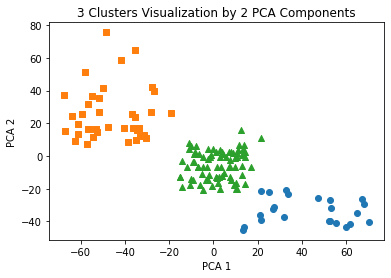

In [11]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = df[df['cluster']==0].index
marker1_ind = df[df['cluster']==1].index
marker2_ind = df[df['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=df.loc[marker0_ind,'pca_x'], y=df.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=df.loc[marker1_ind,'pca_x'], y=df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2_ind,'pca_x'], y=df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#### 1.10 데이터를 이용한 군집 평가

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#### 1.11 1.5와 1.7의 코드를 바탕으로 데이터셋의 모든 개별 데이터에 실루엣 계수 값을 구해주세요.

In [13]:
score_samples = silhouette_samples(df, df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (200,)


#### 1.12 데이터셋 데이터프레임에 실루엣 계수 칼럼을 추가해주세요.

In [14]:
df['silhouette_coeff'] = score_samples

#### 1.13 모든 데이터의 평균 실루엣 계수값을 구하고 확인해주세요.

In [15]:
average_score = silhouette_score(df, df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

df.head(3)

붓꽃 데이터셋 Silhouette Analysis Score:0.500


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y,silhouette_coeff
0,19,15,39,0,1,39,0,13.543666,-45.225793,0.180112
1,21,15,81,0,1,81,4,-44.964888,-46.170026,0.691012
2,20,16,6,1,0,6,0,59.858804,-43.497032,0.534060


#### 1.14 데이터셋의 군집 칼럼별로 groupby하여 실루엣 계수 칼럼의 평균값을 구해주세요.

In [16]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.425713
1    0.530935
2    0.510757
3    0.457239
4    0.553914
Name: silhouette_coeff, dtype: float64

#### 1.15 Inertia와 Elbow를 구하는 코드입니다. 참고해주세요.

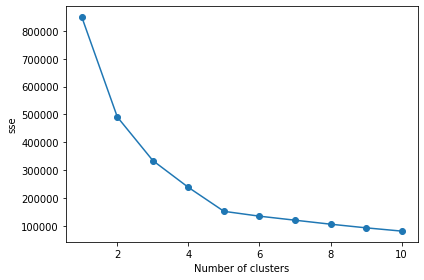

In [17]:
# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집의 개수가 1~11까지 kmeans를 실행 --> sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)

# sse array 시각화   
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.tight_layout()
plt.show()

#### 2.1 데이터는 1의 데이터를 계속 활용합니다. 'Annual income'에 대한 'Spending Score'을 scatter plot으로 나타내주세요.

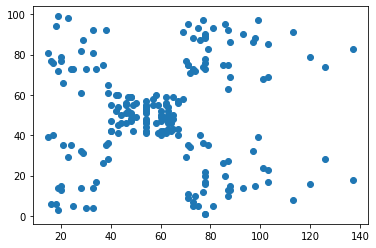

In [18]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

#### 2.2 StandardScaler를 통해 정규화를 진행해주세요.

In [23]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y,silhouette_coeff
0,19,15,39,0,1,39,0,13.543666,-45.225793,0.180112
1,21,15,81,0,1,81,4,-44.964888,-46.170026,0.691012
2,20,16,6,1,0,6,0,59.858804,-43.497032,0.534060
3,23,16,77,1,0,77,4,-39.098471,-45.091011,0.689979
4,31,17,40,1,0,40,0,13.818241,-43.297037,0.188536
...,...,...,...,...,...,...,...,...,...,...
195,35,120,79,1,0,79,1,-41.751427,58.804929,0.509407
196,45,126,28,1,0,28,3,30.960891,65.900656,0.416091
197,32,126,74,0,1,74,1,-35.268111,64.929303,0.442831
198,32,137,18,0,1,18,3,42.945812,77.174493,0.428337


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df.iloc[:,:5]), columns=df.iloc[:,:5].columns)
df_std.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


#### 2.3 최적 대역폭을 구하여 평균 이동 군집화를 진행해주세요. 최적 bandwidth와 cluster label 유형을 출력해주세요. (인자 : df_std)

In [24]:
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

h = estimate_bandwidth(df_std)
ms = MeanShift(bandwidth = h)
cluster_labels = ms.fit_predict(df_std) 


#### 2.4 target 변수를 'Spending Score'로 설정하여 결과를 확인하려고 합니다. 다음 코드의 빈칸을 채워주세요.

In [26]:
df_std['target'] = df_std['Spending Score (1-100)']
df_std['cluster']= cluster_labels
result = df_std.groupby(['target','cluster'])['Annual Income (k$)'].count()
print(result)

target     cluster
-1.910021  1          2
-1.832378  1          1
-1.793556  1          2
-1.754735  0          2
           1          2
                     ..
 1.739206  0          1
           1          1
 1.816849  1          2
 1.855671  0          1
 1.894492  0          1
Name: Annual Income (k$), Length: 120, dtype: int64


#### 2.5 2차원으로 축소하여 시각화를 진행하려고 합니다. 다음 코드의 빈칸을 채워주세요.

In [30]:
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_std)

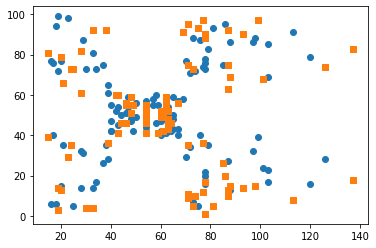

In [31]:
m0_ind = df_std[df_std['cluster'] == 0].index
m1_ind = df_std[df_std['cluster'] == 1].index

plt.scatter(x=df.loc[m0_ind,'Annual Income (k$)'], y=df.loc[m0_ind,'Spending Score (1-100)'],marker='o')
plt.scatter(x=df.loc[m1_ind,'Annual Income (k$)'], y=df.loc[m1_ind,'Spending Score (1-100)'],marker='s')

plt.show()

#### 2.6 사이킷런 AgglomerativeClustering 클래스를 통해 병합군집을 진행해주세요. 클러스터 개수는 3으로, 병합 방식은 'ward'로 설정해주세요. cluster labels 유형을 출력해주세요.  (인자 : df)

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
agg = AgglomerativeClustering(n_clusters = 3,linkage = "ward")
cluster_labels = agg.fit_predict(df)
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


#### 2.7 덴드로그램을 그려주세요.

In [36]:
from scipy.cluster.hierarchy import dendrogram, ward

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [17.5, 17.5, 78.125, 78.125],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [132.5, 132.5, 171.25, 171.25],
  [47.8125, 47.8125, 151.875, 151.875],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [275.0, 275.0, 285.0, 285.0],
  [243.75, 243.75, 280.0, 280.0],
  [212.5, 212.5, 261.875, 261.875],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [345.0, 345.

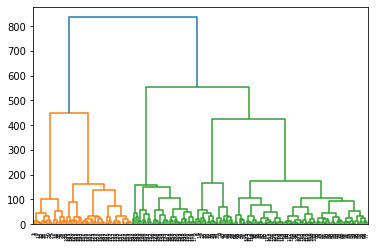

In [37]:
linkage_array = ward(df)
dendrogram(linkage_array)

#### 2.8 다시 데이터를 로드하고 다음 코드를 실행해주세요.

In [46]:
df = pd.read_csv("/content/gdrive/MyDrive/euron study/csv파일/Mall_Customers.csv")
df = df.drop('CustomerID', axis=1)
df = pd.get_dummies(df)

#### 2.9 AIC, BIC를 구하여 n_components 값을 결정하려고 합니다. 다음 코드의 빈칸을 채워주세요.

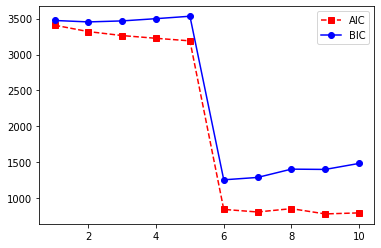

In [41]:
# AIC, BIC
from sklearn.mixture import GaussianMixture

gmm_per_k = [GaussianMixture(n_components = k, n_init=10, random_state=0).fit(df) for k in range(1,11)]

bics = [model.bic(df) for model in gmm_per_k]  # model 별 bic 구하기
aics = [model.aic(df) for model in gmm_per_k]  # model 별 aic 구하기

plt.plot(range(1,11), aics, 'rs--')
plt.plot(range(1,11), bics, 'bo-')
plt.legend(['AIC','BIC'])
plt.show()

#### 2.10 GMM 군집화를 진행해주세요. 위의 결과를 참고하여 n_components를 결정해주세요. 이후 군집화 결과를 확인하기 위한 코드에서 빈칸을 채워주세요. (인자 : df) 

In [42]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 6,random_state = 0).fit(df)
gmm_cluster_labels = gmm.predict(df)

In [43]:
df['gmm_cluster'] = gmm_cluster_labels
df['target'] = df['Spending Score (1-100)']

result = df.groupby(['target'])['gmm_cluster'].value_counts()
print(result)

target  gmm_cluster
1       0              2
3       2              1
4       2              2
5       0              3
        2              1
                      ..
94      3              1
95      4              2
97      4              2
98      3              1
99      3              1
Name: gmm_cluster, Length: 121, dtype: int64


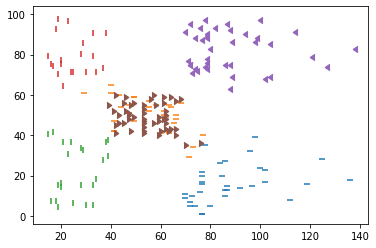

In [44]:
for i in range(0,6):
  m_ind = df[df['gmm_cluster'] == i].index
  plt.scatter(x=df.loc[m_ind,'Annual Income (k$)'], y=df.loc[m_ind,'Spending Score (1-100)'],marker=i)

plt.show()

3.1

(1) 앞에서 사용한 Mall_Customers 데이터를 다시 사용하겠습니다. 아래 코드를 불러주세요.

In [45]:
df = pd.read_csv("/content/gdrive/MyDrive/euron study/csv파일/Mall_Customers.csv")
df = df.drop('CustomerID', axis=1)
df = pd.get_dummies(df)

(2) 보다 용이한 시각화를 위해 "Annual Income (k$)", "Spending Score (1-100)" 열들만 사용하여 2개의 feature에 대한 고객 군집화를 진행하겠습니다. 그러기 위해 빈칸(<?>)을 채워주세요.

In [47]:
data = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


(3) DBSCAN 군집화를 실행하기 전, 위에서 만든 data에 대한 정규화를 위해 빈칸(<?>)을 채워주세요.

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
data_scale.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


(4) DBSCAN 클래스를 이용해 위에서 생성한 데이터를 군집화하기 위해 빈칸(<?>)을 채워주세요.(eps = 0.4, min_samples=5, metric="euclidean")

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
dbscan = DBSCAN(eps = 0.4, min_samples=5, metric="euclidean")
dbscan_labels =dbscan.fit_predict(data_scale)
data_scale["cluster"] = dbscan_labels

(5) 위에서 진행한 군집화의 결과를 시각화하겠습니다. 빈칸(<?>)을 채워주세요.

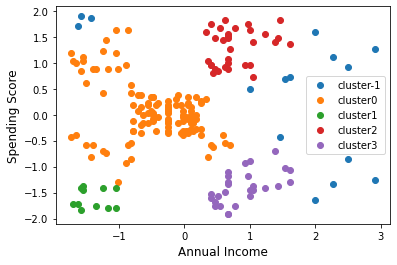

In [53]:
for i in range(-1,4):
    plt.scatter(data_scale.loc[data_scale["cluster"]==i, "Annual Income (k$)"],
               data_scale.loc[data_scale["cluster"]==i,"Spending Score (1-100)"],
                label = "cluster" + str(i))
    
plt.legend()
plt.xlabel("Annual Income", size=12)
plt.ylabel("Spending Score",size=12)
plt.show()

(6) cluster의 값이 -1인 경우가 존재하는 것을 확인할 수 있습니다. 해당 값은 무엇을 의미하는지 작성해주세요.

[답안]

: 잡음 포인트

3.2

(1) 위에서 만든 df 데이터셋을 이용하겠습니다. BayesianGaussianMixture를 사용하여 베이지안 가우시안 모델을 이용한 군집화를 진행하기 위해 빈칸(<?>)을 채워주세요.(n_components=10, n_init=10)

In [54]:
from sklearn.mixture import BayesianGaussianMixture

In [55]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(df)

BayesianGaussianMixture(n_components=10, n_init=10)

(2) 몇 개의 컴포넌트가 필요한지 알아내는 코드를 작성해주세요.

In [59]:
(np.round(bgm.weights_,2)>0).sum()


9